In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models,layers,Sequential
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle

In [2]:
class_names = ["MCI","AD","CN"]

In [3]:
path=r"C:\Users\matrix\Desktop\MRI\Training"

In [4]:
def brainExtraction(img,threshVal):
    ret, thresh = cv2.threshold(img, threshVal, 255, cv2.THRESH_TOZERO)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                       
    # draw contours on the original image
    image_copy = img.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
    c = max(contours, key = cv2.contourArea)
    mask = np.zeros(image_copy.shape, np.uint8)
    cv2.drawContours(mask, [c], 0, (255),-1)
    out = np.zeros_like(img) # Extract out the object and place into output image
    out[mask == 255] = img[mask == 255]
    return out

In [5]:
def testFun(img,threshVal):
    ret, thresh = cv2.threshold(img, threshVal, 255, cv2.THRESH_TOZERO)
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                       
    # draw contours on the original image
    image_copy = img.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
    c = max(contours, key = cv2.contourArea)
    mask = np.zeros(image_copy.shape, np.uint8)
    out=cv2.drawContours(mask, [c], 0, (255),-1)
    return out

In [6]:
import pickle
fileOpen = open(path+'/data_v3',"rb")
data = pickle.load(fileOpen)
fileOpen.close()

trainData=data['X']
trainDataLables=data['y']
print(trainData.shape,trainDataLables.shape)

(600, 256, 256, 1) (600,)


In [7]:
trainLables=tf.keras.utils.to_categorical(trainDataLables, num_classes=len(class_names), dtype='float32')

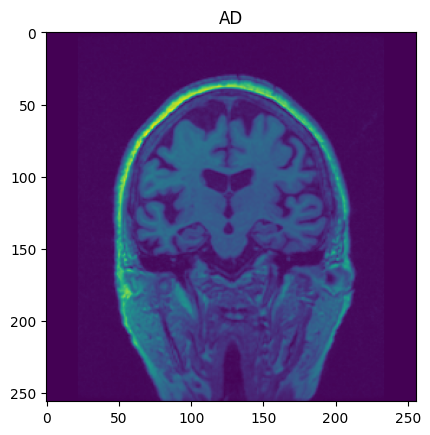

In [8]:
i=250
plt.imshow(trainData[i])
plt.title(class_names[trainDataLables[i]])
plt.show()

In [9]:
trainData,trainDataLables=shuffle(trainData,trainDataLables)

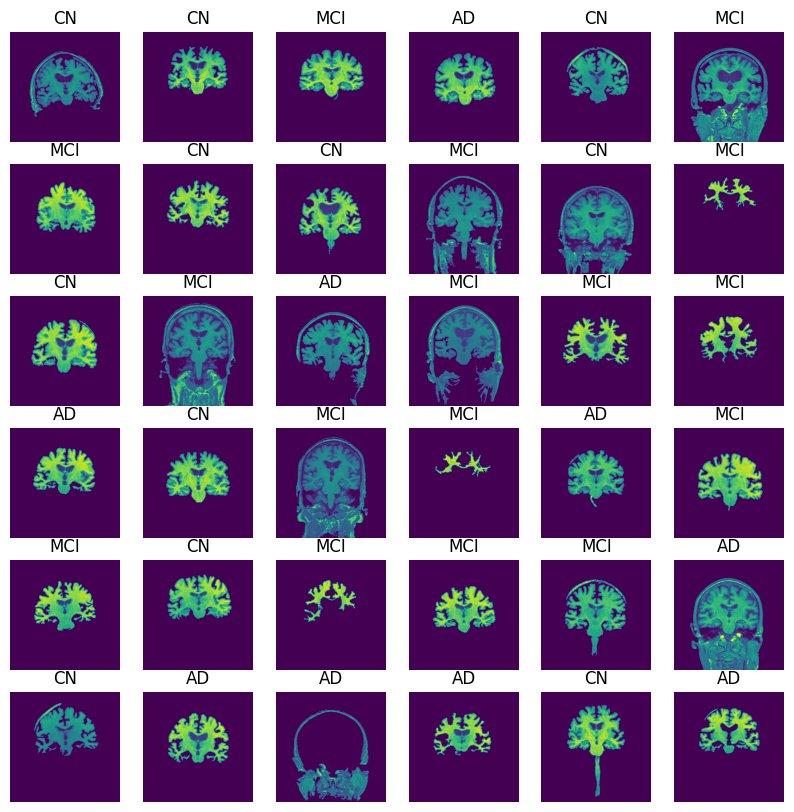

In [19]:
plt.figure(figsize=(10, 10))
i=0
for x in range(36):
    ax = plt.subplot(6, 6, i+1)
    i+=1
    img=trainData[x].reshape(256, 256)
    plt.imshow(brainExtraction(img,60))
    plt.title(class_names[trainDataLables[x]])
    plt.axis("off")
plt.show()

In [20]:
tempData=[]
for i in range(len(trainData)):
    img=trainData[i].reshape(256, 256)
    tempData.append(brainExtraction(img,60))
tempData=np.array(tempData)

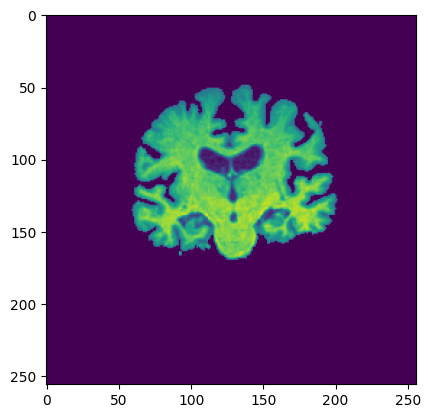

In [21]:
plt.imshow(tempData[3])
plt.show()

In [56]:
brainPath=r"C:\Users\matrix\Desktop\brainData"